Значения признаков:
    
    client_id - идентификатор клиента
    education - уровень образования
    sex - пол заемщика
    age - возраст заемщика
    car - флаг наличия автомобиля
    car_type - флаг автомобиля иномарки
    decline_app_cnt - количество отказанных прошлых заявок
    good_work - флаг наличия “хорошей” работы
    bki_request_cnt - количество запросов в БКИ
    home_address - категоризатор домашнего адреса
    work_address - категоризатор рабочего адреса
    income - доход заемщика
    foreign_passport - наличие загранпаспорта
    sna - связь заемщика с клиентами банка
    first_time - давность наличия информации о заемщике
    score_bki - скоринговый балл по данным из БКИ
    region_rating - рейтинг региона
    app_date - дата подачи заявки
    default - флаг дефолта по кредиту

In [45]:
# Копия для редактирования

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import (
    mean_squared_error,
    f1_score,
    accuracy_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
)
from matplotlib import pyplot as pl
import seaborn as sns

sns.set()


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from data_viz_functions import *


kaggle/input/sf-scoring.zip
kaggle/input/sample_submission.csv
kaggle/input/train.csv
kaggle/input/test.csv


In [46]:
DATA_DIR = 'kaggle/input'

df_train = pd.read_csv(DATA_DIR +'/train.csv')
df_test = pd.read_csv(DATA_DIR +'/test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [47]:
sample_submission.shape

(36349, 2)

In [48]:
df_train.shape

(73799, 19)

In [49]:
df_test.shape

(36349, 18)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [51]:
df_train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [53]:
sample_submission.head(5)

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0


In [54]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  36349 non-null  int64
 1   default    36349 non-null  int64
dtypes: int64(2)
memory usage: 568.1 KB


In [55]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
df_test['default'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [56]:
data.nunique(dropna=False)

client_id           110148
app_date               120
education                6
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
sample                   2
default                  2
dtype: int64

In [57]:
num_cols = ['age', 'score_bki', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
cat_cols = ['education', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

<AxesSubplot:>

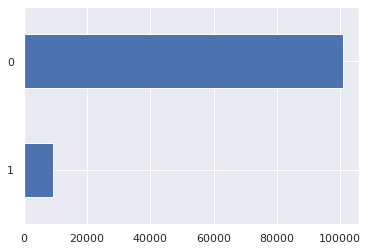

In [58]:
data['default'].value_counts(ascending=True).plot(kind='barh')

In [59]:
data.drop(['client_id','app_date',], axis = 1, inplace=True)

In [60]:
# Заподнение пропускоы в ['education'] наиболее частым значением 'SCH'
data["education"].fillna(data.education.mode(), inplace=True)

In [61]:
data = pd.get_dummies(data, columns=['education'], dummy_na=True)

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in bin_cols:
    data[column] = le.fit_transform(data[column])
    
columns = ['first_time', 'sna', 'work_address', 'home_address', 'region_rating']

for column in columns:
    data[column] = le.fit_transform(data[column])

In [63]:
# логарифмируем признак age
data['age'] = np.log(data['age'] + 1)

# логарифмируем признак decline_app_cnt
data['decline_app_cnt'] = np.log(data['decline_app_cnt'] + 1)

# логарифмируем признак income
data['income'] = np.log(data['income'] + 1)

# логарифмируем признак bki_request_cnt
data['bki_request_cnt'] = np.log(data.bki_request_cnt + 1)



In [64]:
#Нормализация численных данных
from sklearn.preprocessing import StandardScaler

for column in num_cols:
    data[column] = StandardScaler().fit_transform(np.array(data[column].values).reshape(-1, 1))


## результат препроцессинга

In [65]:
data.sample(5, random_state=1337).T

,82932,77499,23750,51729,79930
sex,0.000000,0.000000,0.000000,1.000000,1.000000
age,0.374157,-0.554416,-0.888776,-1.007707,-1.130811
car,1.000000,0.000000,0.000000,1.000000,1.000000
car_type,1.000000,0.000000,0.000000,0.000000,1.000000
decline_app_cnt,-0.418815,-0.418815,-0.418815,1.499512,1.499512
good_work,0.000000,0.000000,0.000000,0.000000,0.000000
score_bki,-0.371541,-0.951335,0.989854,-1.715195,0.471786
bki_request_cnt,-0.281790,0.333797,-1.334144,0.333797,1.386150
region_rating,4.000000,6.000000,3.000000,3.000000,3.000000
home_address,0.000000,1.000000,0.000000,1.000000,0.000000


In [66]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample', 'default'], axis=1)

y = train_data['default'].values  # наш таргет
X = train_data.drop(['default'], axis=1)

In [67]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
from sklearn.model_selection import train_test_split

# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# проверяем
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59039, 21), (14760, 21), (59039,), (14760,))

In [69]:
random_seed = 42
C = np.logspace(-2, 1, 10)
iter_ = 100
epsilon_stop = 1e-3
 
param_grid = [
    {'penalty': ['l1'], 
     'C': C,
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'],
     #'C': C,
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'],
     'C': C,
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['elasticnet'],
     'class_weight':['none', 'balanced'], 
     'C': C,
     'solver': ['saga'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

In [70]:
# Импортируем необходимые библиотеки:
from sklearn.linear_model import LogisticRegression # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
from sklearn.model_selection import GridSearchCV

In [71]:
model = LogisticRegression(random_state=random_seed)

# # Обучаем модель
# gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
# gridsearch.fit(X_train, y_train)
# model_best_params = gridsearch.best_estimator_

# # Печатаем параметры
# best_params = model_best_params.get_params()
# print(f'Лучшие значения параметров:') 
# for param_name in best_params.keys():
#         print(f'  {param_name} = {best_params[param_name]},')

Результат работы по подбору паарметров параметров:
  C = 0.1,
  class_weight = balanced,
  dual = False,
  fit_intercept = True,
  intercept_scaling = 1,
  l1_ratio = None,
  max_iter = 1000,
  multi_class = auto,
  n_jobs = None,
  penalty = l1,
  random_state = 42,
  solver = liblinear,
  tol = 0.001,
  verbose = 0,
  warm_start = False

Лучшие значения параметров:
  C = 1.0,
  class_weight = balanced,
  dual = False,
  fit_intercept = True,
  intercept_scaling = 1,
  l1_ratio = None,
  max_iter = 1000,
  multi_class = auto,
  n_jobs = None,
  penalty = l2,
  random_state = 42,
  solver = newton-cg,
  tol = 0.001,
  verbose = 0,
  warm_start = False,


In [72]:
# Обучаем модель

best_params = {
    "C": 1.0,
    "class_weight": "balanced",
    "dual": False,
    "fit_intercept": True,
    "intercept_scaling": 1,
    "l1_ratio": None,
    "max_iter": 1000,
    "multi_class": "auto",
    "n_jobs": None,
    "penalty": "l2",
    "random_state": 42,
    "solver": "newton-cg",
    "tol": 0.001,
    "verbose": 0,
    "warm_start": False,
}

logreg = LogisticRegression(
    **best_params
    # solver="liblinear", max_iter=1000, class_weight="balanced", random_state=random_seed
)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [73]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     12933
           1       0.22      0.68      0.34      1827

    accuracy                           0.67     14760
   macro avg       0.58      0.67      0.56     14760
weighted avg       0.85      0.67      0.72     14760



                precision    recall  f1-score   support

           0       0.88      1.00      0.93     12933
           1       0.50      0.00      0.00      1827

    accuracy                           0.88     14760
   macro avg       0.69      0.50      0.47     14760
weighted avg       0.83      0.88      0.82     14760


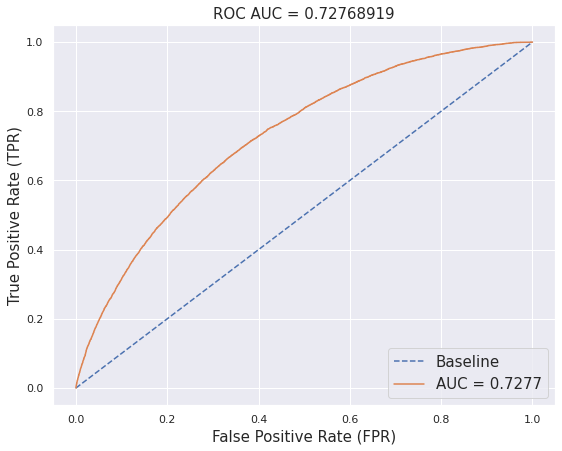

In [74]:
plot_roc_auc(y_train, logreg.predict_proba(X_train).T[1])

In [75]:
#Построение матрицы ошибок
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred))

confusion_matrix:
[[8612 4321]
 [ 584 1243]]


## Пробуем другие модели



CatBoostClassifier
Learning rate set to 0.058777
0:	learn: 0.6464560	total: 24ms	remaining: 24s
1:	learn: 0.6099128	total: 42.7ms	remaining: 21.3s
2:	learn: 0.5755756	total: 59.3ms	remaining: 19.7s
3:	learn: 0.5449533	total: 75ms	remaining: 18.7s
4:	learn: 0.5183917	total: 91.7ms	remaining: 18.2s
5:	learn: 0.4960120	total: 108ms	remaining: 17.9s
6:	learn: 0.4761434	total: 127ms	remaining: 18.1s
7:	learn: 0.4605089	total: 143ms	remaining: 17.8s
8:	learn: 0.4465614	total: 160ms	remaining: 17.6s
9:	learn: 0.4352923	total: 174ms	remaining: 17.2s
10:	learn: 0.4244292	total: 189ms	remaining: 17s
11:	learn: 0.4151756	total: 207ms	remaining: 17s
12:	learn: 0.4068301	total: 222ms	remaining: 16.8s
13:	learn: 0.3996799	total: 237ms	remaining: 16.7s
14:	learn: 0.3940085	total: 251ms	remaining: 16.5s
15:	learn: 0.3884257	total: 265ms	remaining: 16.3s
16:	learn: 0.3840267	total: 279ms	remaining: 16.1s
17:	learn: 0.3797664	total: 292ms	remaining: 16s
18:	learn: 0.3757957	total: 308ms	remaining: 15.

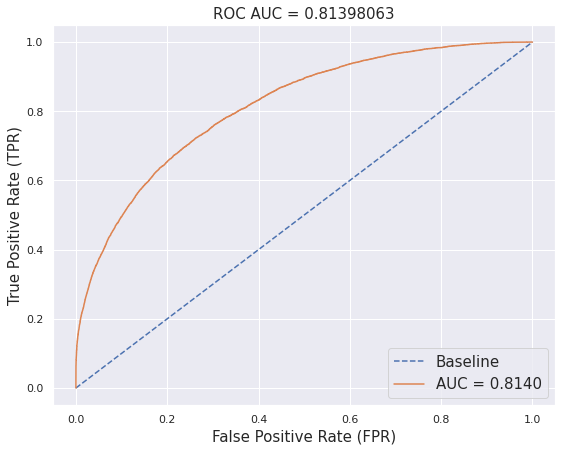



LGBMClassifier


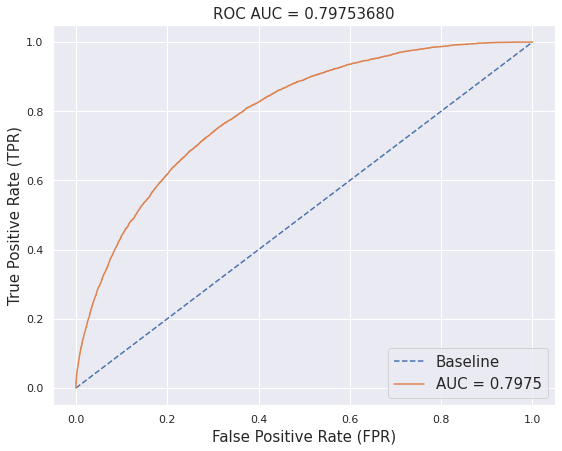



LogisticRegression


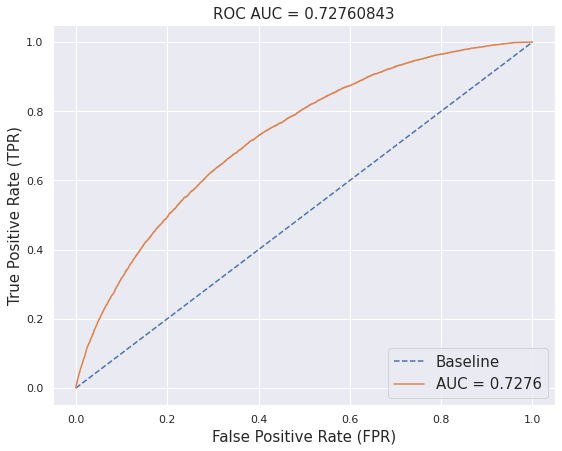



HistGradientBoostingClassifier


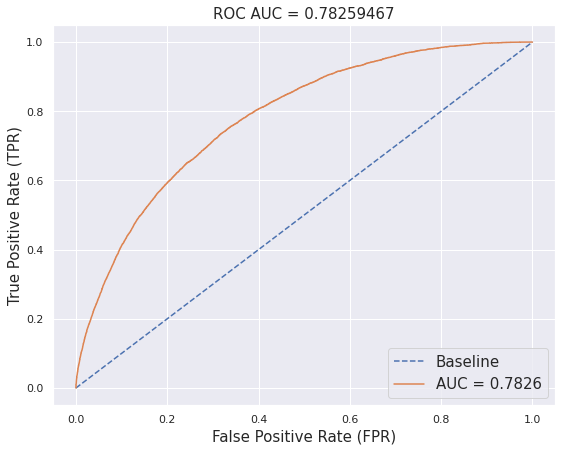



RandomForestClassifier


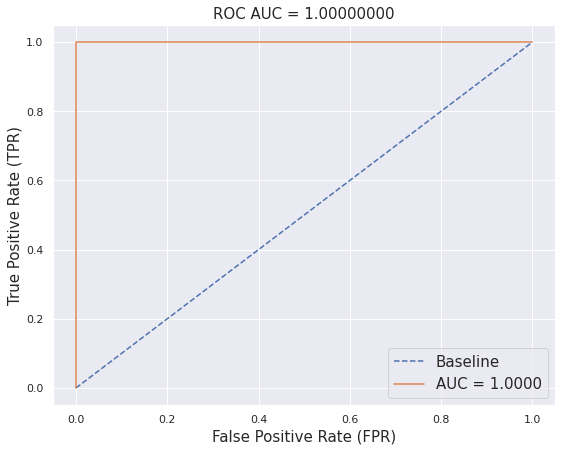

In [76]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

for name, model in (
    ("CatBoostClassifier", CatBoostClassifier()),
    ("LGBMClassifier", LGBMClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
):
    print("\n\n" + name)
    plot_roc_auc(y_train, model.fit(X_train, y_train).predict_proba(X_train).T[1])

Несколько выводов:

- гридсёрчнутые параметры не сильно то и вытянули логистическую регрессию в безлайне
- catboost даже с параметрами по умолчанию значительно опережает отальные модели, будем тюнить его

## Undersampling 


In [78]:

from imblearn.under_sampling import RandomUnderSampler

random_seed=42

rus = RandomUnderSampler(random_state=42)
X_us, y_us = rus.fit_resample(X, y)


X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.10, shuffle = True, random_state=random_seed)

logreg_us = LogisticRegression(solver='saga', max_iter=1000, random_state=random_seed)
logreg_us.fit(X_train_us, y_train_us)

y_pred_us = logreg_us.predict(X_test_us)



Learning rate set to 0.034427
0:	learn: 0.6890783	total: 23.5ms	remaining: 23.5s
1:	learn: 0.6850223	total: 36.5ms	remaining: 18.2s
2:	learn: 0.6814562	total: 43.7ms	remaining: 14.5s
3:	learn: 0.6778680	total: 52.4ms	remaining: 13.1s
4:	learn: 0.6742260	total: 59.7ms	remaining: 11.9s
5:	learn: 0.6710137	total: 66.8ms	remaining: 11.1s
6:	learn: 0.6679108	total: 75ms	remaining: 10.6s
7:	learn: 0.6655390	total: 82.7ms	remaining: 10.3s
8:	learn: 0.6629602	total: 88.5ms	remaining: 9.74s
9:	learn: 0.6603828	total: 95ms	remaining: 9.4s
10:	learn: 0.6582901	total: 102ms	remaining: 9.21s
11:	learn: 0.6557818	total: 109ms	remaining: 8.96s
12:	learn: 0.6536794	total: 117ms	remaining: 8.85s
13:	learn: 0.6517062	total: 123ms	remaining: 8.7s
14:	learn: 0.6498284	total: 130ms	remaining: 8.51s
15:	learn: 0.6480455	total: 136ms	remaining: 8.36s
16:	learn: 0.6461361	total: 142ms	remaining: 8.23s
17:	learn: 0.6445283	total: 149ms	remaining: 8.12s
18:	learn: 0.6431210	total: 155ms	remaining: 8s
19:	learn:

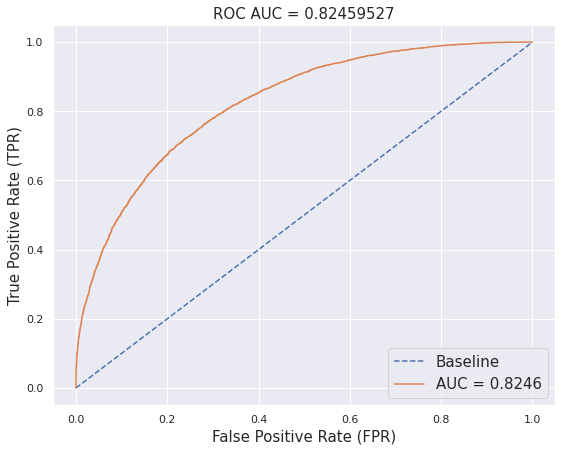

In [79]:
plot_roc_auc(y_train_us, CatBoostClassifier().fit(X_train_us, y_train_us).predict_proba(X_train_us).T[1])

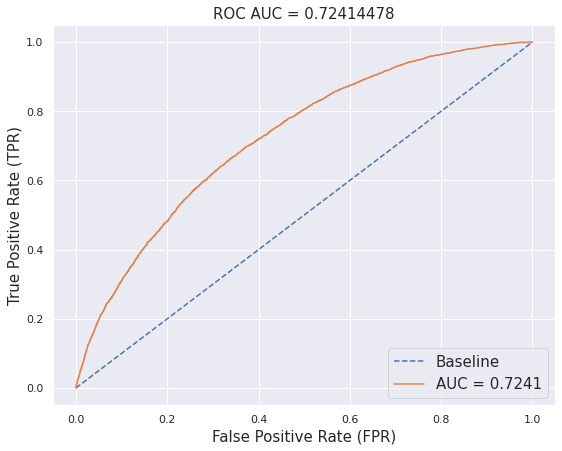

In [80]:
plot_roc_auc(y_train_us,logreg_us.predict_proba(X_train_us).T[1])

In [81]:
#Построение матрицы ошибок
print('confusion_matrix:')
print(confusion_matrix(y_test_us,y_pred_us))

confusion_matrix:
[[620 303]
 [297 655]]


In [82]:
#Построение матрицы ошибок на тестовых данных без US
print('confusion_matrix:')
print(confusion_matrix(y_test,logreg_us.predict(X_test)))


confusion_matrix:
[[8681 4252]
 [ 582 1245]]


Undersampling дал небольшое улучшение итогового результата для логистической регрессии и более значительное - для кэтбуста

# Submission

In [83]:
# если качество нас устраивает, обучаем финальную модель на всех обучающи данных
# logreg_final = LogisticRegression(solver='liblinear', max_iter=1000,penalty='l2', C=0.51)
random_seed = 42
model = CatBoostClassifier()
model.fit(X_us, y_us)


Learning rate set to 0.036012
0:	learn: 0.6883859	total: 16.7ms	remaining: 16.7s
1:	learn: 0.6839368	total: 34.1ms	remaining: 17s
2:	learn: 0.6802011	total: 47.6ms	remaining: 15.8s
3:	learn: 0.6765364	total: 60ms	remaining: 14.9s
4:	learn: 0.6726510	total: 70.7ms	remaining: 14.1s
5:	learn: 0.6692470	total: 81.2ms	remaining: 13.4s
6:	learn: 0.6660508	total: 88.9ms	remaining: 12.6s
7:	learn: 0.6631982	total: 97.5ms	remaining: 12.1s
8:	learn: 0.6604662	total: 118ms	remaining: 13s
9:	learn: 0.6582048	total: 131ms	remaining: 13s
10:	learn: 0.6559681	total: 139ms	remaining: 12.5s
11:	learn: 0.6538005	total: 146ms	remaining: 12s
12:	learn: 0.6513850	total: 157ms	remaining: 11.9s
13:	learn: 0.6491596	total: 167ms	remaining: 11.7s
14:	learn: 0.6470853	total: 179ms	remaining: 11.7s
15:	learn: 0.6452415	total: 187ms	remaining: 11.5s
16:	learn: 0.6435198	total: 202ms	remaining: 11.7s
17:	learn: 0.6418814	total: 212ms	remaining: 11.6s
18:	learn: 0.6403837	total: 236ms	remaining: 12.2s
19:	learn: 0.

In [85]:
#predict_submission = logreg_final.predict(test_data)
#Делаем финальное предсказание на основе модели, обученной на данных с undersampling 
predict_submission = logreg_us.predict(test_data)

In [86]:
sample_submission['default'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,1
2,75683,0
3,26883,0
4,28862,0
5,99881,1
6,26630,1
7,79934,0
8,16605,0
9,105449,0


In [87]:
sample_submission.describe()

,client_id,default
count,36349.000000,36349.000000
mean,54945.647473,0.375031
std,31706.052195,0.484138
min,4.000000,0.000000
25%,27744.000000,0.000000
50%,54657.000000,0.000000
75%,82322.000000,1.000000
max,110148.000000,1.000000


## Kaggle score: $0.33933$

In [88]:
# !kaggle competitions submit -c sf-scoring -f ssubmission.csv -m "Message"
# !kaggle competitions submit your-competition-name -f submission.csv -m 'My submission message'